#1. 이해하기
> 기존에 분류되어 있는 데이터셋에서 새롭게 추가된 데이터가 어느 부분에 포함되는지 분류하는 알고리즘

> 여기서는 코드 이미지를 출력하기 위해 사용된 것으로 무시할 것이다.

In [ ]:
!pip install mglearn

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=FutureWarning)


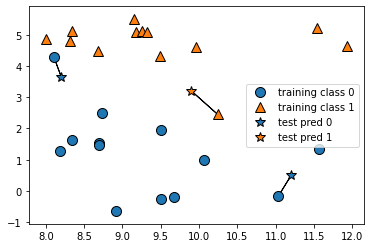

In [ ]:
import mglearn

mglearn.plots.plot_knn_classification(n_neighbors=1)

> 위의 그림에서 학습된 데이터는 삼각형과 동그라미이다. 새롭게 별이 들어왔을 경우 어떤 부분으로 분류할 것인지 결정하는 알고리즘이 KNN이다. n_neighbors가 1이면 1개의 인접데이터를 확인하고 분류하게 된다.

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=FutureWarning)


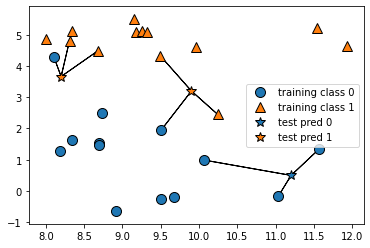

In [ ]:
mglearn.plots.plot_knn_classification(n_neighbors=3)

> n_neighbors가 3개이면 그중 가장 많이 나타나는 값으로 분류하게 된다.

In [ ]:
from sklearn.model_selection import train_test_split
X, y = mglearn.datasets.make_forge()

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=FutureWarning)


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier(n_neighbors=3)
clf.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [ ]:
print("테스트 세트 예측: {}".format(clf.predict(X_test)))

테스트 세트 예측: [1 0 1 0 1 0 0]


In [ ]:
print("테스트 세트 정확도: {:.2f}".format(clf.score(X_test, y_test)))

테스트 세트 정확도: 0.86


/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51060 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 50883 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 53945 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49457 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 53945 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 49457 missing from current font.
  font.set_te

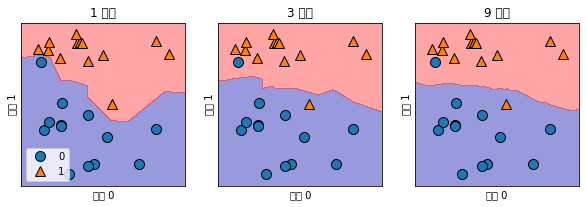

In [ ]:
import matplotlib.pyplot as plt


fig, axes = plt.subplots(1, 3, figsize=(10, 3))

for n_neighbors, ax in zip([1, 3, 9], axes):
    # fit 메서드는 self 객체를 반환합니다.
    # 그래서 객체 생성과 fit 메서드를 한 줄에 쓸 수 있습니다.
    clf = KNeighborsClassifier(n_neighbors=n_neighbors).fit(X, y)
    mglearn.plots.plot_2d_separator(clf, X, fill=True, eps=0.5, 
                                    ax=ax, alpha=.4)
    mglearn.discrete_scatter(X[:, 0], X[:, 1], y, ax=ax)
    ax.set_title("{} 이웃".format(n_neighbors))
    ax.set_xlabel("특성 0")
    ax.set_ylabel("특성 1")
axes[0].legend(loc=3)

> n_neighbors=1일 때 모델링이 학습 데이터 셋에 가까운 결정 경계를 만들어 낸다. 학습 데이터와 가깝다는 이야기는 훈련 데이터를 인식하기 어렵다는 것이다. 결국 경계가 가장 부드럽게 나타나는 9번이 가장 안정적으로 인식할 수 있는 모델이 되는 것이다.

#2. 클래스
> KNN은 KNeighborsClassifier 클래스를 이용하여 구할 수 있다.

##2.1 n_neighbors
> 기본값은 5를 가지게 되며 너무 크면 경계 부분을 잘못 분류할 수있고 너무 작으면 이상치에 영향을 크게 받을 것이며 패턴이 직관적이지 못하게 된다.

##2.2 weights
> 예측에 사용하는 가중치를 의미한다.
* uniform은 단순 평균을 의미하며 각 이웃에 동일한 가중치 부여한다.
* distance는 가중치 평균으로 가까운 이웃이 멀리 있는 이웃보다 더욱 큰 영향을 미친다.

##2.3 Metric
> 거리 측정 방식을 변경하는 매개변수로 default 값은 minkowski이다

###2.3.1 유클리드 거리(Euclidean Distance)
> 유클리드 공간에서의 기하학적 최단 거리(직선 거리)

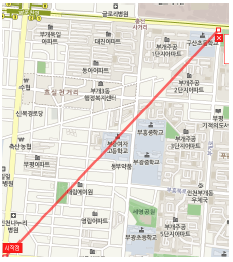

###2.3.2 맨해튼 거리(Manhattan distance)
> 격자 형태의 지도에서 한 점에 도달하기 위한 거리

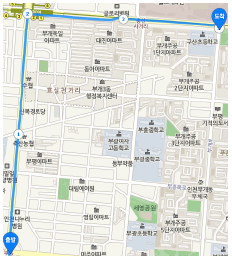

###2.3.3 민코프스키 거리 (Minkowski distance)
> p-norm을 활용하여 일반화한 것으로, 맨하탄 거리와 유클리드 거리가 하나의 공식으로 표현된다.

> norm은 벡터의 길이 혹은 크기를 측정하는 방법으로 L1과 L2 그리고 Maximum 세 가지를 가지고 있다.
* L1 : 맨허튼 거리로 L1 Reqularization(L1 정규화 or 일반화), Computer Vision(이미지 및 동영상 분석)
* L2 : 유클리디안 거리로 L2 Regularization(L2 정규화 or 일반화), kNN 알고리즘, kmean 알고리즘

# 참고 사이트
> * https://velog.io/@guns/%EB%A8%B8%EC%8B%A0%EB%9F%AC%EB%8B%9D-%EC%8A%A4%ED%84%B0%EB%94%94-3%EC%9D%BC%EC%B0%A8-K-NN-K-Nearest-Neighbor
* http://taewan.kim/post/norm/
* https://tensorflow.blog/%ED%8C%8C%EC%9D%B4%EC%8D%AC-%EB%A8%B8%EC%8B%A0%EB%9F%AC%EB%8B%9D/2-3-2-k-%EC%B5%9C%EA%B7%BC%EC%A0%91-%EC%9D%B4%EC%9B%83/
* https://light-tree.tistory.com/125


https://tensorflow.blog/%ED%8C%8C%EC%9D%B4%EC%8D%AC-%EB%A8%B8%EC%8B%A0%EB%9F%AC%EB%8B%9D/2-3-2-k-%EC%B5%9C%EA%B7%BC%EC%A0%91-%EC%9D%B4%EC%9B%83/